Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import warnings
warnings.filterwarnings("ignore")

2024-07-13 22:05:20.146186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 22:05:20.146314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 22:05:20.273624: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [51]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/kaggle/input/melanoma-dataset/Train/Train")
data_dir_test = pathlib.Path('/kaggle/input/melanoma-dataset/Test/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    batch_size= batch_size,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    batch_size= batch_size,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

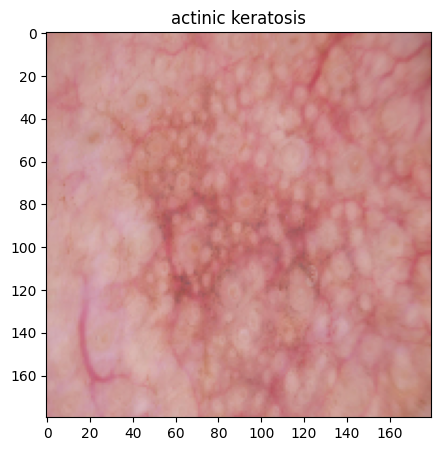

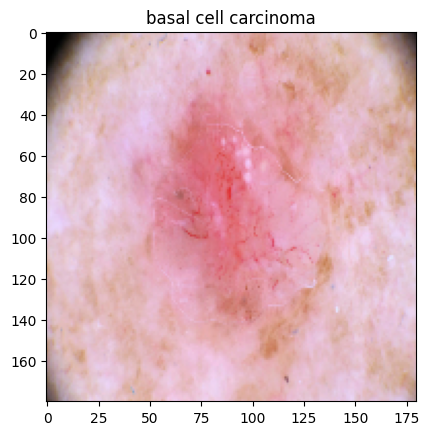

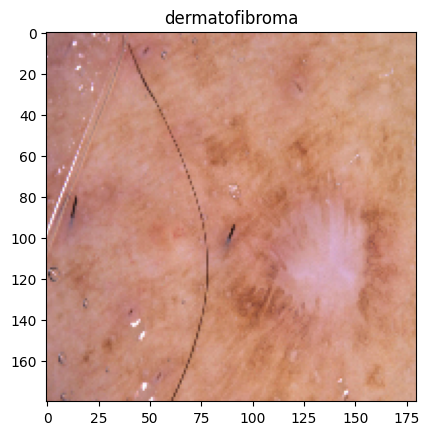

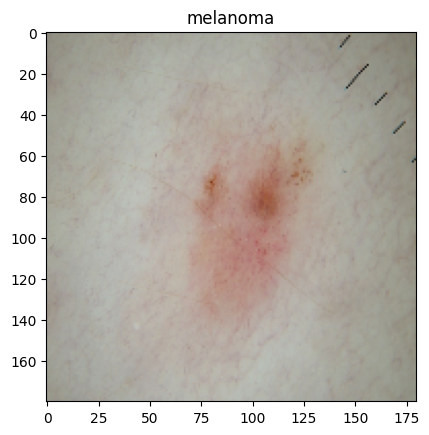

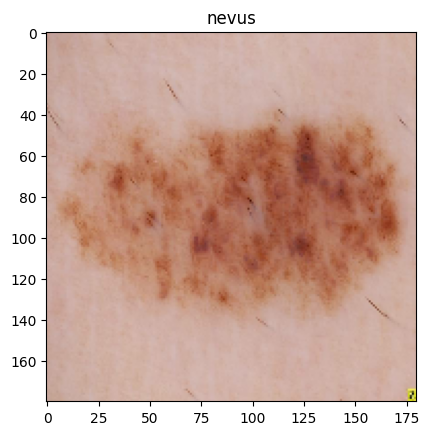

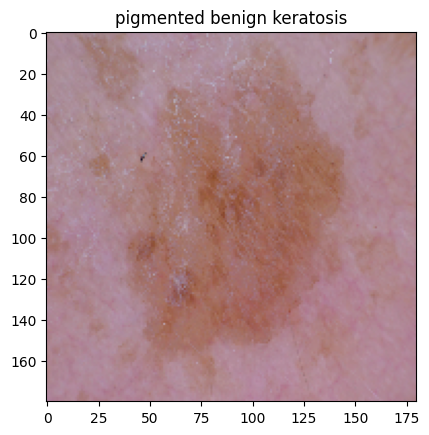

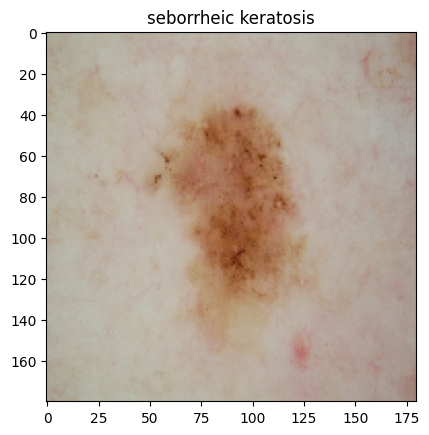

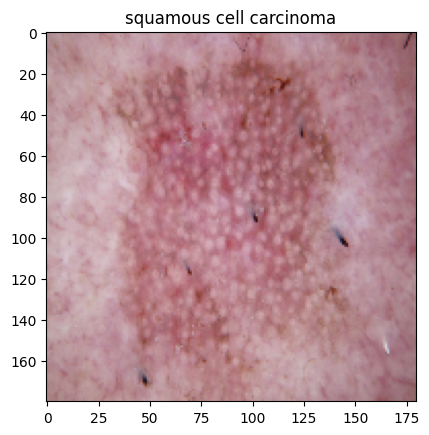

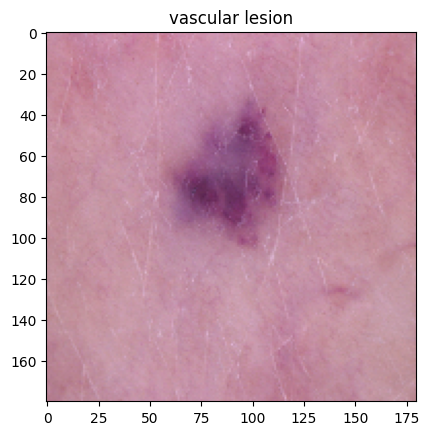

In [8]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

class_label = 0
plt.figure(figsize=(5,5))
# Loop through the dataset
for images, labels in train_ds:
  # Convert labels to NumPy array and iterate through them
  index = np.where(labels.numpy() == class_label)
  if class_label > 8:
    break

  if index[0].size > 0:
    # Indices are not empty, process them
    first_index = index[0][0]
  else:
    continue

  plt.imshow(images[first_index].numpy().astype("uint8"))
  plt.title(class_names[class_label])
  plt.show()

  class_label+=1



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_pr = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_pr = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
### Your code goes here
rescaling_layer = keras.layers.Rescaling(scale=1./255)  # Normalize pixel values to [0, 1]

# Applying the rescalling
train_ds_pr = train_ds_pr.map(lambda images, labels: (rescaling_layer(images), tf.one_hot(labels, depth=9)))
val_ds_pr = val_ds_pr.map(lambda images, labels: (rescaling_layer(images), tf.one_hot(labels, depth=9)))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [11]:
#Initialize the model.
# model architecture

model = Sequential()

In [12]:
# model architecture
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape = (img_width, img_height, 3)))

model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 180, 180, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 178, 178, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 178, 178, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 89, 89, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 89, 89, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 87, 87, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 87, 87, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 236672)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   121,176,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 9)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,422,025 (463.19 MB)

 Trainable params: 121,422,025 (463.19 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds_pr,
  validation_data=val_ds_pr,
  epochs=epochs
)

Epoch 1/20
 1/56 ━━━━━━━━━━━━━━━━━━━━ 31:25 34s/step - accuracy: 0.0625 - loss: 2.2282

I0000 00:00:1720908373.517948     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720908373.541634     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.1981 - loss: 3.9932

W0000 00:00:1720908381.954647     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 53s 337ms/step - accuracy: 0.1981 - loss: 3.9695 - val_accuracy: 0.2058 - val_loss: 2.0372
Epoch 2/20
 1/56 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.1562 - loss: 2.0562

W0000 00:00:1720908392.218293     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.2181 - loss: 2.0669 - val_accuracy: 0.2662 - val_loss: 1.9564
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.2749 - loss: 1.9293 - val_accuracy: 0.2707 - val_loss: 1.9566
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.3058 - loss: 1.8319 - val_accuracy: 0.3065 - val_loss: 1.8501
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.3642 - loss: 1.7226 - val_accuracy: 0.3065 - val_loss: 1.8361
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.4176 - loss: 1.6108 - val_accuracy: 0.3647 - val_loss: 1.7492
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.4694 - loss: 1.5285 - val_accuracy: 0.3893 - val_loss: 1.6772
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.4427 - loss: 1.5509 - val_accuracy: 0.3490 - val_loss: 1.7804
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.4483 - loss: 1.5138 - val_accuracy: 0.4474 - val_

### Visualizing training results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
1. The training accuracy was constatntly increasing and training loss was constatntly decreasing over the epochs.
2. Validation accuracy increased till 13th epoch but then no improvement seen in validation accuracy.
3. Because, there the validation accuracy didn't increase with training accuracy we can say that it's an overfitting problem.

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

# Let's Create preprocessing layers

flip = tf.keras.layers.RandomFlip("horizontal_and_vertical")
rotation = tf.keras.layers.RandomRotation(0.3)
translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
zoom = tf.keras.layers.RandomZoom(0.3)
contrast = tf.keras.layers.RandomContrast(0.2)


def augment_data(images, labels):
  augmented_images = flip(images)
  augmented_images = rotation(augmented_images)
  augmented_images = translation(augmented_images)
  augmented_images = zoom(augmented_images)
  augmented_images = contrast(augmented_images)

  return augmented_images, labels

#These random augmentations genrates diversity in images and help model to generalise patterns.

In [18]:
# Apply augmentation using map function
train_ds_pr = train_ds_pr.map(augment_data)

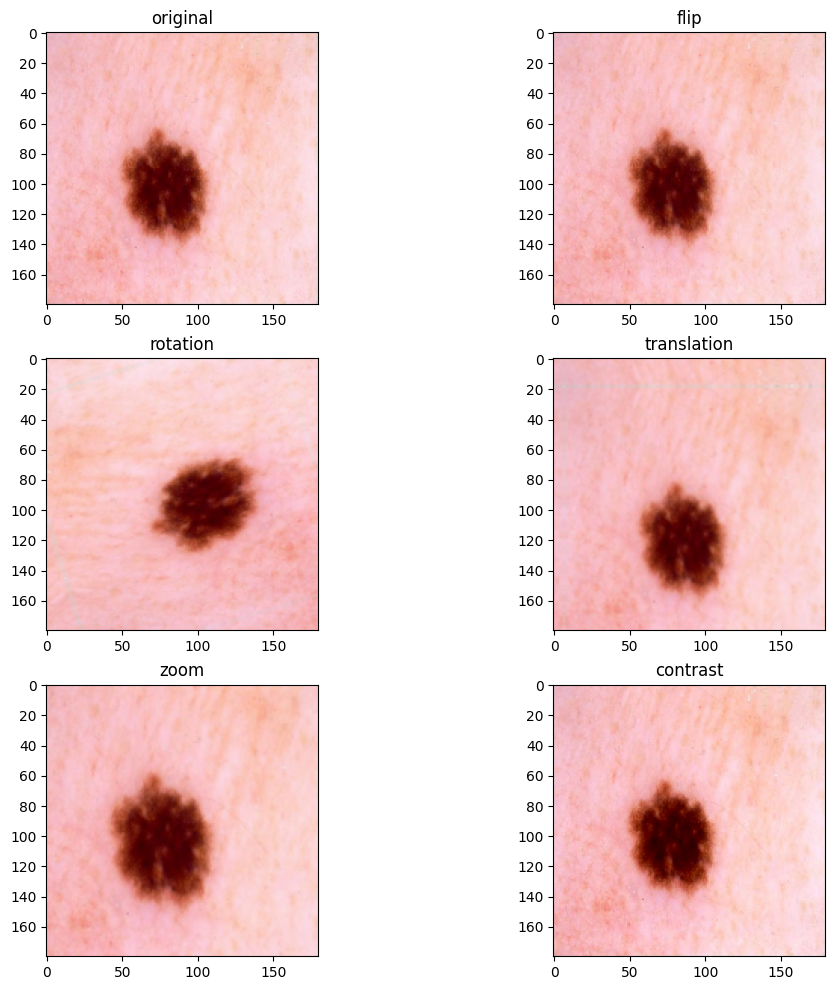

In [19]:
4# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# Visualize images and augmentations
fig, ax = plt.subplots(3, 2, figsize=(12,12))

for images, labels in train_ds:
    ax[0][0].imshow(images[0].numpy().astype("uint8"))
    ax[0][0].set_title("original")
    # resize
    ax[0][1].imshow(flip(images[0]).numpy().astype("uint8"))
    ax[0][1].set_title("flip")
    # rotation
    ax[1][0].imshow(rotation(images[0]).numpy().astype("uint8"))
    ax[1][0].set_title("rotation")
    # translation
    ax[1][1].imshow(translation(images[0]).numpy().astype("uint8"))
    ax[1][1].set_title("translation")
    # zoom
    ax[2][0].imshow(zoom(images[0]).numpy().astype("uint8"))
    ax[2][0].set_title("zoom")
    # contrast
    ax[2][1].imshow(contrast(images[0]).numpy().astype("uint8"))
    ax[2][1].set_title("contrast")
    break
plt.show()

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(img_width, img_height, 3)))

model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))


### Compiling the model

In [21]:
## Your code goes here

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds_pr,
  validation_data=val_ds_pr,
  epochs=epochs
)

Epoch 1/20
 1/56 ━━━━━━━━━━━━━━━━━━━━ 5:27 6s/step - accuracy: 0.1562 - loss: 2.1900

W0000 00:00:1720908557.040966     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.1718 - loss: 4.9016

W0000 00:00:1720908577.915854     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 390ms/step - accuracy: 0.1721 - loss: 4.8666 - val_accuracy: 0.2170 - val_loss: 1.9433
Epoch 2/20


W0000 00:00:1720908578.657663     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 385ms/step - accuracy: 0.2311 - loss: 1.9743 - val_accuracy: 0.3110 - val_loss: 1.8189
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 378ms/step - accuracy: 0.3027 - loss: 1.8976 - val_accuracy: 0.3915 - val_loss: 1.6861
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 373ms/step - accuracy: 0.3486 - loss: 1.8249 - val_accuracy: 0.3311 - val_loss: 1.7736
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 378ms/step - accuracy: 0.3619 - loss: 1.7422 - val_accuracy: 0.4251 - val_loss: 1.6182
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 366ms/step - accuracy: 0.3814 - loss: 1.6779 - val_accuracy: 0.4094 - val_loss: 1.6225
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 371ms/step - accuracy: 0.3748 - loss: 1.6823 - val_accuracy: 0.3826 - val_loss: 1.6504
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 380ms/step - accuracy: 0.3673 - loss: 1.6636 - val_accuracy: 0.4251 - val_loss: 1.5734
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 379ms/step - accuracy: 0.4035 - loss: 1.5909 - val_accuracy: 0.465

### Visualizing the results

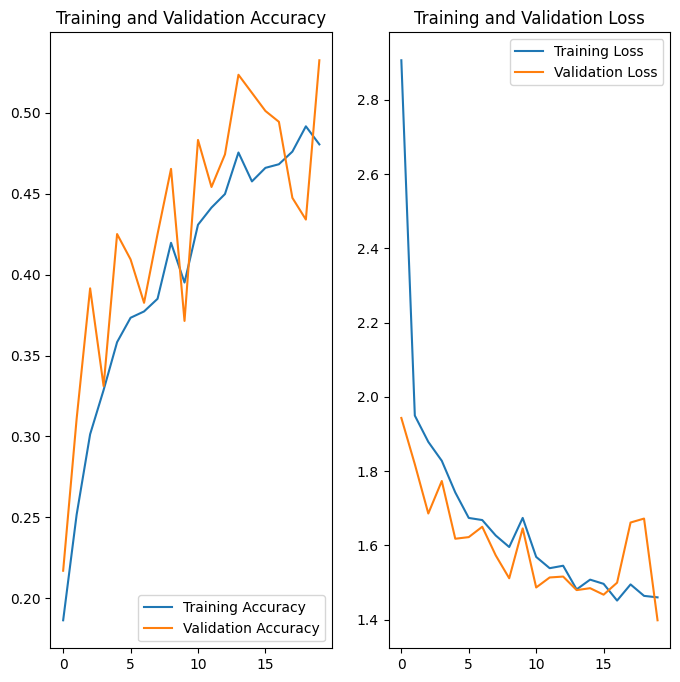

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

1. Definitely the condition of overfitting is gone now.
2. But still the accuracy is less, and should be improved

**Note: I tried the same model as before data augmentation, then I added two more covolutional layers with 32 filters each.**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.

class_counts = {}
for labels in train_ds:
  # Extract labels from each batch
  batch_labels = labels[1].numpy()
  # Count occurrences using loop and dictionary
  for label in batch_labels:
    label_name = class_names[int(label)]  # Convert label index to class name
    if label_name in class_counts:
      class_counts[label_name] += 1
    else:
      class_counts[label_name] = 1

# Create a DataFrame using zip and DataFrame constructor
original_df = pd.DataFrame(list(zip(class_counts.keys(), class_counts.values())), columns = ['Label', 'counts'])

print(original_df)


                        Label  counts
0                    melanoma     352
1        basal cell carcinoma     309
2                       nevus     277
3  pigmented benign keratosis     370
4             vascular lesion     115
5        seborrheic keratosis      58
6           actinic keratosis      92
7     squamous cell carcinoma     142
8              dermatofibroma      77


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - seborrheic keratosis : 58
#### - Which classes dominate the data in terms proportionate number of samples?
#### - pigmented benign keratosis : 370

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

## **NOTE : I am using Kaggle platform instead of Google Colab that's why the code is bit different.**

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset= "/kaggle/input/melanoma-dataset/Train/Train/"

import tempfile
import Augmentor

working_dir = os.getcwd()  # Get current working directory

augmented_dir = os.path.join(working_dir, "augment")  # Create "augment" directory within working dir
os.makedirs(augmented_dir, exist_ok=True)  # Create directory if it doesn't exist

for i in class_names:
  output_dir = os.path.join(augmented_dir, i)  # Create output directory within "augment"
  os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

  p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory=output_dir)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500)


Initialised with 114 image(s) found.
Output directory set to /kaggle/working/augment/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EA2D1E1EFB0>: 100%|██████████| 500/500 [00:06<00:00, 77.10 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/augment/basal cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EA2D1E5D150>: 100%|██████████| 500/500 [00:06<00:00, 82.06 Samples/s] 


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/augment/dermatofibroma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EA3021A0970>: 100%|██████████| 500/500 [00:06<00:00, 79.49 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/augment/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EA30220DCC0>: 100%|██████████| 500/500 [00:39<00:00, 12.55 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/augment/nevus.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7EA2F06B5570>: 100%|██████████| 500/500 [00:28<00:00, 17.33 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/augment/pigmented benign keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EA3023A9120>: 100%|██████████| 500/500 [00:06<00:00, 72.30 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/augment/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EA3021BDED0>: 100%|██████████| 500/500 [00:16<00:00, 31.20 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/augment/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EA2F0730AF0>: 100%|██████████| 500/500 [00:07<00:00, 69.15 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/augment/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EA38440D300>: 100%|██████████| 500/500 [00:06<00:00, 75.93 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
#Augmented data directory
augmented_data = pathlib.Path("/kaggle/working/augment")

In [32]:
image_count_train = len(list(augmented_data.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
path_list = [x for x in augmented_data.glob(os.path.join('*', '*.jpg'))]
path_list

[PosixPath('/kaggle/working/augment/dermatofibroma/dermatofibroma_original_ISIC_0026254.jpg_9e90d362-c943-4a17-b507-4bf1fee644d9.jpg'),
 PosixPath('/kaggle/working/augment/dermatofibroma/dermatofibroma_original_ISIC_0029297.jpg_93e858cb-115d-4430-b245-af89f5e77e9c.jpg'),
 PosixPath('/kaggle/working/augment/dermatofibroma/dermatofibroma_original_ISIC_0033695.jpg_bcc96b37-93fd-4dec-9585-826ed858125a.jpg'),
 PosixPath('/kaggle/working/augment/dermatofibroma/dermatofibroma_original_ISIC_0028926.jpg_b454fc0b-2732-435d-a668-1a20e1a8cdf4.jpg'),
 PosixPath('/kaggle/working/augment/dermatofibroma/dermatofibroma_original_ISIC_0027008.jpg_5b81b217-e57b-4bdc-9112-8458c492ddfc.jpg'),
 PosixPath('/kaggle/working/augment/dermatofibroma/dermatofibroma_original_ISIC_0030442.jpg_3c8a5833-3c97-45f5-8c72-ad14989a3ab0.jpg'),
 PosixPath('/kaggle/working/augment/dermatofibroma/dermatofibroma_original_ISIC_0031429.jpg_be065891-d893-4f44-9bfc-c62e759a5da8.jpg'),
 PosixPath('/kaggle/working/augment/dermatofibro

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in augmented_data.glob(os.path.join('*','*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [42]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [43]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [44]:
new_df = df2['Label'].value_counts().to_frame(name = 'counts').reset_index()

In [45]:
new_df

,Label,counts
0,dermatofibroma,500
1,seborrheic keratosis,500
2,actinic keratosis,500
3,vascular lesion,500
4,basal cell carcinoma,500
5,squamous cell carcinoma,500
6,melanoma,500
7,pigmented benign keratosis,500
8,nevus,500


In [46]:
#This was the original counts
original_df

,Label,counts
0,melanoma,352
1,basal cell carcinoma,309
2,nevus,277
3,pigmented benign keratosis,370
4,vascular lesion,115
5,seborrheic keratosis,58
6,actinic keratosis,92
7,squamous cell carcinoma,142
8,dermatofibroma,77


In [47]:
# Merge DataFrames based on 'Label' column (outer join to include all labels)
merged_counts = new_df.merge(original_df, how='outer', on='Label')

# Add a new column named 'total_count' with the sum of counts
merged_counts['total_count'] = merged_counts['counts_x'] + merged_counts['counts_y']

# Optionally, drop unused columns (if present)
merged_counts = merged_counts.drop(columns=['counts_x', 'counts_y'], errors='ignore')

print(merged_counts)

                        Label  total_count
0           actinic keratosis          592
1        basal cell carcinoma          809
2              dermatofibroma          577
3                    melanoma          852
4                       nevus          777
5  pigmented benign keratosis          870
6        seborrheic keratosis          558
7     squamous cell carcinoma          642
8             vascular lesion          615


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [56]:
# Create training datasets for original data with validation data
train_ds_1  = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="training"  # Use 'validation' for validation set
)

# Create a dataset for augmented data with validation data
train_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
    augmented_data,
    labels='inferred',  # Infer labels from subdirectory names (if applicable)
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="training"  # Use 'validation' for validation set
)

# Combine the separate training datasets
train_ds = train_ds_1.concatenate(train_ds_2)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

#### **Todo:** Create your model (make sure to include normalization)

In [58]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_pr = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_pr = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [59]:
### Your code goes here
rescaling_layer = keras.layers.Rescaling(scale=1./255)  # Normalize pixel values to [0, 1]

# Applying the rescalling
train_ds_pr = train_ds_pr.map(lambda images, labels: (rescaling_layer(images), tf.one_hot(labels, depth=9)))
val_ds_pr = val_ds_pr.map(lambda images, labels: (rescaling_layer(images), tf.one_hot(labels, depth=9)))

In [61]:
#Creating the model
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(img_width, img_height, 3)))

model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [62]:
## Your code goes here

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [63]:
epochs = 30
history = model.fit(
  train_ds_pr,
  validation_data=val_ds_pr,
  epochs=epochs
)

Epoch 1/30
  1/169 ━━━━━━━━━━━━━━━━━━━━ 34:41 12s/step - accuracy: 0.0938 - loss: 2.2010

W0000 00:00:1720911449.558978     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 80/169 ━━━━━━━━━━━━━━━━━━━━ 34s 384ms/step - accuracy: 0.1259 - loss: 3.3224

W0000 00:00:1720911479.958677     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.1404 - loss: 2.8282

W0000 00:00:1720911493.018726     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720911495.276723     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 293ms/step - accuracy: 0.1406 - loss: 2.8251 - val_accuracy: 0.2962 - val_loss: 1.9722
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.2740 - loss: 1.9344 - val_accuracy: 0.3608 - val_loss: 1.5884
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.3952 - loss: 1.5555 - val_accuracy: 0.4878 - val_loss: 1.3699
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.4877 - loss: 1.3692 - val_accuracy: 0.5241 - val_loss: 1.2837
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.5459 - loss: 1.2228 - val_accuracy: 0.5664 - val_loss: 1.1630
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 145ms/step - accuracy: 0.6309 - loss: 1.0284 - val_accuracy: 0.5783 - val_loss: 1.1950
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.6891 - loss: 0.8764 - val_accuracy: 0.6481 - val_loss: 1.0351
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.7036 - loss: 0.8911 - val

#### **Todo:**  Visualize the model results

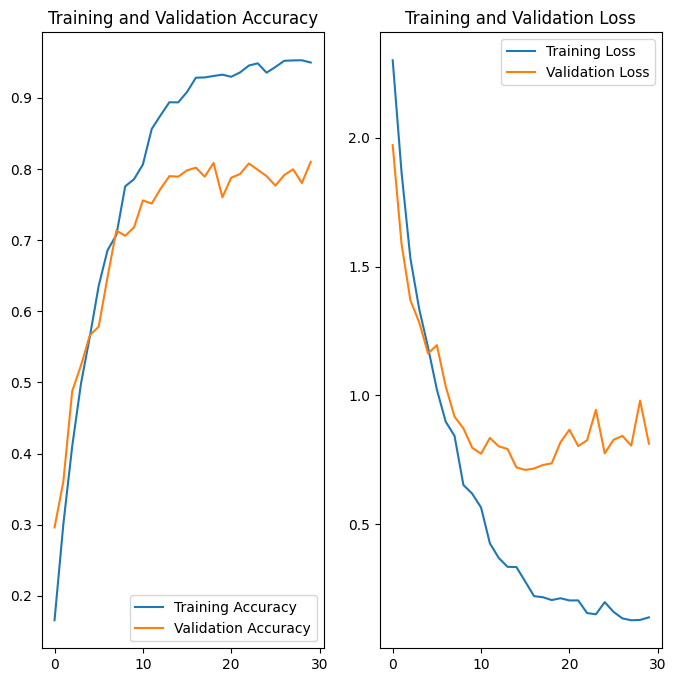

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1. The Validation and training accuracy drastically improved after adding augmented data.
2. Stll the condition of Overfitting persists as there is a difference of 0.15 between training and validation accuracies.
3. But the Overfitting condition is definitely improved from the initial model, where the difference was almost 0.25